In [1]:
import pandas as pd

/Users/hiromi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df_rent = pd.read_csv('Metro_ZORI_AllHomesPlusMultifamily_SSA.csv')

In [4]:
# df_rent.info()

In [5]:
df_rent.shape

(106, 92)

In [6]:
df_rent[df_rent['2014-01'].isna()]

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05
22,394982,"Pittsburgh, PA",22,NaN,1006.0,1010.0,1014.0,1018.0,1021,1025,...,1188,1190,1192,1195,1197,1200,1202,1205,1207,1210.0
45,395022,"Richmond, VA",45,NaN,1040.0,1045.0,1049.0,1053.0,1057,1061,...,1305,1311,1317,1323,1329,1335,1341,1347,1353,1359.0
70,394521,"Dayton, OH",70,NaN,802.0,803.0,804.0,805.0,806,808,...,1021,1027,1033,1040,1046,1053,1059,1066,1072,1079.0
71,394486,"Columbia, SC",72,NaN,936.0,940.0,944.0,948.0,951,954,...,1162,1170,1179,1187,1196,1205,1213,1222,1231,1241.0
81,395224,"Wichita, KS",82,NaN,736.0,739.0,741.0,744.0,746,749,...,828,832,835,839,842,845,849,852,856,859.0
92,395245,"Youngstown, OH",93,NaN,585.0,587.0,588.0,590.0,591,593,...,703,708,713,718,722,727,732,737,741,746.0
93,394352,"Augusta, GA",94,NaN,909.0,911.0,912.0,913.0,914,916,...,1114,1122,1130,1138,1146,1154,1162,1170,1178,1186.0


In [8]:
# df_rent.RegionName.unique()

In [9]:
df_rent = df_rent.set_index('RegionName')

*pick 20 metro areas + US along with LinkedIn workforce report

In [10]:
df_metro = df_rent.loc[['United States', 'Atlanta, GA', 'Austin, TX','Boston, MA','Chicago, IL','Cleveland, OH', 'Dallas-Fort Worth, TX', 'Denver, CO', 'Detroit, MI', 'Houston, TX', 'Los Angeles-Long Beach-Anaheim, CA', 'Miami-Fort Lauderdale, FL',  'Minneapolis-St Paul, MN','Nashville, TN', 'New York, NY', 'Philadelphia, PA',  'Phoenix, AZ',  'San Francisco, CA', 'Seattle, WA', 'St. Louis, MO',  'Washington, DC'  ]]

In [11]:
df_metro = df_metro.drop(columns= ['RegionID', 'SizeRank'] )

In [17]:
# df_metro.info()
# df_metro.head()

In [16]:
df_metro['bapandemic'] = df_metro['2021-05'] / df_metro['2020-02']*100-100
df_metro['yoy'] = df_metro['2021-05'] / df_metro['2020-05']*100-100
df_metro['2yoy'] = df_metro['2021-05'] / df_metro['2019-05']*100-100
df_metro['5yoy'] = df_metro['2021-05'] / df_metro['2016-05']*100-100
df_metro['7yoy'] = df_metro['2021-05'] / df_metro['2014-05']*100-100
df_metro.head()

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2021-01,2021-02,2021-03,2021-04,2021-05,yoy,2yoy,5yoy,7yoy,bapandemic
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,1340.0,1347.0,1354.0,1362.0,1369.0,1376,1383,1390,1397,1404,...,1722,1727,1731,1736,1740.0,2.413184,4.379124,15.384615,27.100073,2.533883
"Atlanta, GA",1110.0,1115.0,1120.0,1125.0,1130.0,1135,1140,1145,1150,1155,...,1631,1644,1657,1670,1684.0,8.855850,12.717537,33.122530,49.026549,9.921671
"Austin, TX",1171.0,1181.0,1190.0,1199.0,1207.0,1216,1225,1234,1242,1251,...,1504,1510,1515,1521,1527.0,2.897574,4.089980,12.943787,26.512013,2.483221
"Boston, MA",2008.0,2015.0,2022.0,2030.0,2037.0,2044,2051,2058,2065,2072,...,2341,2334,2326,2318,2312.0,-4.383788,-4.462810,4.805077,13.500245,-5.400982
"Chicago, IL",1454.0,1459.0,1465.0,1471.0,1476.0,1481,1487,1492,1497,1503,...,1674,1672,1670,1668,1666.0,-1.826753,-1.303318,5.176768,12.872629,-2.287390


In [61]:
ranking = pd.DataFrame(df_metro['2021-05'].nlargest(10))

In [64]:
change = pd.DataFrame(df_metro['yoy'])

In [66]:
ranking.merge(change, on='RegionName' ).to_csv('ranking.csv')

In [19]:
df_metro.at['San Francisco, CA', 'yoy']

-7.817061303924746

In [21]:
df_metro.at['San Francisco, CA', 'bapandemic']

-9.259259259259252

<AxesSubplot:xlabel='RegionName'>

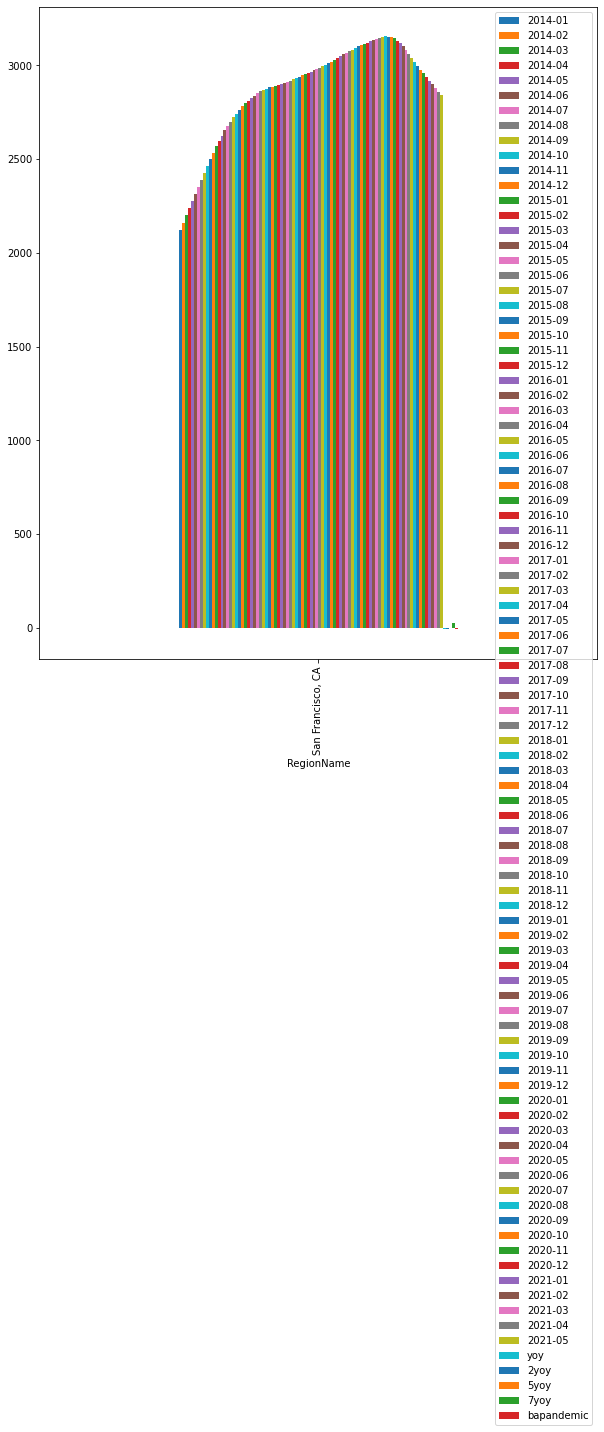

In [38]:
df_metro.filter(items=['San Francisco, CA'], axis='index').plot(kind='bar' , figsize=(10,12))

In [22]:
dfSanFrancisco = df_metro.filter(items=['San Francisco, CA'], axis='index')

In [23]:
dfSanFrancisco.T.to_csv("SanFranciscoZORI.csv")

In [26]:
df_metro['bapandemic'].nlargest(5)

RegionName
Phoenix, AZ                  13.849432
Atlanta, GA                   9.921671
Detroit, MI                   8.532934
Cleveland, OH                 6.487889
Miami-Fort Lauderdale, FL     6.345849
Name: bapandemic, dtype: float64

In [28]:
df_metro['bapandemic'].nsmallest(5)

RegionName
San Francisco, CA   -9.259259
New York, NY        -9.103891
Boston, MA          -5.400982
Seattle, WA         -3.730570
Washington, DC      -3.208812
Name: bapandemic, dtype: float64

In [29]:
df_metro['yoy'].nlargest(5)

RegionName
Phoenix, AZ                  12.019567
Atlanta, GA                   8.855850
Detroit, MI                   7.487027
Miami-Fort Lauderdale, FL     6.009489
Cleveland, OH                 5.574614
Name: yoy, dtype: float64

In [30]:
df_metro['yoy'].nsmallest(5)

RegionName
San Francisco, CA   -7.817061
New York, NY        -7.519070
Boston, MA          -4.383788
Seattle, WA         -3.279542
Washington, DC      -2.602410
Name: yoy, dtype: float64

In [31]:
df_metro['2yoy'].nlargest(5)

RegionName
Phoenix, AZ      19.805680
Atlanta, GA      12.717537
Detroit, MI      10.687023
Cleveland, OH     8.267370
St. Louis, MO     8.115419
Name: 2yoy, dtype: float64

In [32]:
df_metro['2yoy'].nsmallest(5)

RegionName
San Francisco, CA   -9.143223
New York, NY        -9.006433
Boston, MA          -4.462810
Washington, DC      -2.461390
Chicago, IL         -1.303318
Name: 2yoy, dtype: float64

In [33]:
df_metro['5yoy'].nlargest(5)

RegionName
Phoenix, AZ              44.414414
Atlanta, GA              33.122530
Detroit, MI              22.673435
Dallas-Fort Worth, TX    18.730887
Nashville, TN            17.939481
Name: 5yoy, dtype: float64

In [34]:
df_metro['5yoy'].nsmallest(5)

RegionName
New York, NY        -4.105461
San Francisco, CA   -0.906555
Washington, DC       3.907455
Boston, MA           4.805077
Chicago, IL          5.176768
Name: 5yoy, dtype: float64

In [35]:
df_metro['7yoy'].nlargest(5)

RegionName
Phoenix, AZ      63.072228
Atlanta, GA      49.026549
Denver, CO       43.132328
Nashville, TN    38.143460
Seattle, WA      36.017570
Name: 7yoy, dtype: float64

In [36]:
df_metro['7yoy'].nsmallest(5)

RegionName
New York, NY       3.918367
Washington, DC     9.896683
Chicago, IL       12.872629
Boston, MA        13.500245
Houston, TX       17.049180
Name: 7yoy, dtype: float64

In [ ]:
# df_metroPC = df_metro.T.pct_change(1).dropna().drop(index=['yoy','2yoy','5yoy','7yoy', 'bapandemic'])

In [39]:
# Divide each column by "20XX-XX".／各列を"20XX-XX"で割る。
df_metroP = df_metro.div(df_metro["2019-05"], axis=0)*100-100
df_metroP.head()

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2021-01,2021-02,2021-03,2021-04,2021-05,yoy,2yoy,5yoy,7yoy,bapandemic
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,-19.616077,-19.196161,-18.776245,-18.296341,-17.876425,-17.456509,-17.036593,-16.616677,-16.196761,-15.776845,...,3.299340,3.599280,3.839232,4.139172,4.379124,-99.855238,-99.737305,-99.077108,-98.374321,-99.847997
"Atlanta, GA",-25.702811,-25.368139,-25.033467,-24.698795,-24.364123,-24.029451,-23.694779,-23.360107,-23.025435,-22.690763,...,9.170013,10.040161,10.910308,11.780455,12.717537,-99.407239,-99.148759,-97.782963,-96.718437,-99.335899
"Austin, TX",-20.177232,-19.495569,-18.882072,-18.268575,-17.723245,-17.109748,-16.496251,-15.882754,-15.337423,-14.723926,...,2.522154,2.931152,3.271984,3.680982,4.089980,-99.802483,-99.721201,-99.117670,-98.192773,-99.830728
"Boston, MA",-17.024793,-16.735537,-16.446281,-16.115702,-15.826446,-15.537190,-15.247934,-14.958678,-14.669421,-14.380165,...,-3.264463,-3.553719,-3.884298,-4.214876,-4.462810,-100.181148,-100.184414,-99.801443,-99.442139,-100.223181
"Chicago, IL",-13.862559,-13.566351,-13.210900,-12.855450,-12.559242,-12.263033,-11.907583,-11.611374,-11.315166,-10.959716,...,-0.829384,-0.947867,-1.066351,-1.184834,-1.303318,-100.108220,-100.077211,-99.693319,-99.237404,-100.135509


In [40]:
df_metroP['2021-05'].nlargest(21)

RegionName
Phoenix, AZ                           19.805680
Atlanta, GA                           12.717537
Detroit, MI                           10.687023
Cleveland, OH                          8.267370
St. Louis, MO                          8.115419
Miami-Fort Lauderdale, FL              8.060183
Nashville, TN                          6.923579
Dallas-Fort Worth, TX                  6.369863
Philadelphia, PA                       5.382620
United States                          4.379124
Austin, TX                             4.089980
Denver, CO                             3.953771
Minneapolis-St Paul, MN                3.328895
Houston, TX                            2.512563
Los Angeles-Long Beach-Anaheim, CA     2.019786
Seattle, WA                           -1.275239
Chicago, IL                           -1.303318
Washington, DC                        -2.461390
Boston, MA                            -4.462810
New York, NY                          -9.006433
San Francisco, CA            

In [55]:
df_metroP.T.drop(index=['yoy','2yoy','5yoy','7yoy','bapandemic']).head(3)

RegionName,United States,"Atlanta, GA","Austin, TX","Boston, MA","Chicago, IL","Cleveland, OH","Dallas-Fort Worth, TX","Denver, CO","Detroit, MI","Houston, TX",...,"Miami-Fort Lauderdale, FL","Minneapolis-St Paul, MN","Nashville, TN","New York, NY","Philadelphia, PA","Phoenix, AZ","San Francisco, CA","Seattle, WA","St. Louis, MO","Washington, DC"
2014-01,-19.616077,-25.702811,-20.177232,-17.024793,-13.862559,-13.544415,-21.986301,-32.177616,-16.717557,-15.577889,...,-17.732402,-21.038615,-25.865447,-14.152966,-15.045396,-28.026906,-32.193095,-30.286929,-13.345356,-12.789575
2014-02,-19.196161,-25.368139,-19.495569,-16.735537,-13.566351,-13.280563,-21.506849,-30.961071,-16.488550,-14.788227,...,-17.248791,-20.639148,-25.016329,-13.724089,-14.721141,-27.653214,-30.946292,-29.543039,-13.074842,-12.403475
2014-03,-18.776245,-25.033467,-18.882072,-16.446281,-13.210900,-13.016711,-21.027397,-29.744526,-16.183206,-13.998564,...,-16.818915,-20.239680,-24.167211,-13.295211,-14.461738,-27.279522,-29.699488,-28.852285,-12.714157,-12.017375


In [43]:
# !pip install seaborn

In [44]:
import seaborn as sns
sns.set(font='DejaVu Sans')

In [50]:
covidimpact_rent = df_metroP.T

In [51]:
covidimpact_rent.to_csv("covid_impact_rent.csv")

<AxesSubplot:>

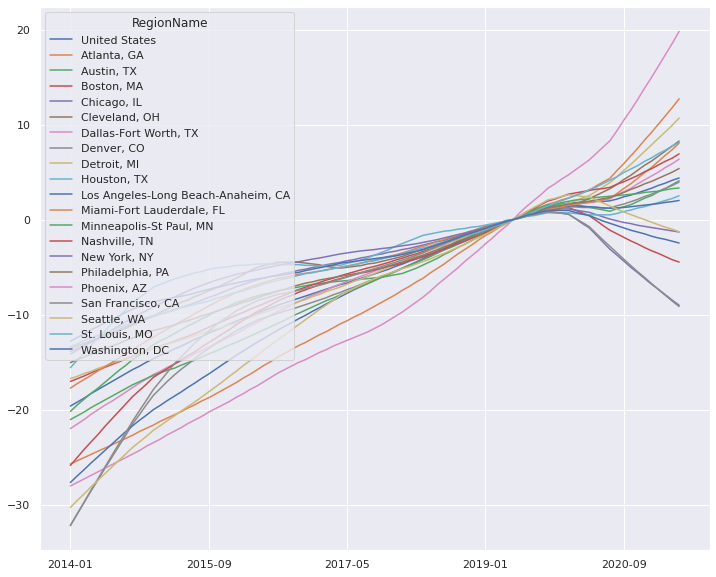

In [53]:
covidimpact_rent.drop(index=['yoy','2yoy','5yoy','7yoy','bapandemic']).plot(figsize = (12, 10))